Plot distributions of surrogate neural firing rates during natural song modeled using Baker et al neural data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_plot

FBAKER_LIN_PARAM = 'data/simple/neur/baker_lin_fit_param.csv'
PFX_BAKER_LIN_TR = 'data/simple/mlv/neur_basic/baker_lin/mlv_baker_lin_tr'

FBAKER_LN_PARAM = 'data/simple/neur/baker_ln_fit_param.csv'
PFX_BAKER_LN_TR = 'data/simple/mlv/neur_basic/baker_ln/mlv_baker_ln_tr'

FBAKER_MA_PARAM = 'data/simple/neur/baker_ma_fit_param.csv'
PFX_BAKER_MA_TR = 'data/simple/mlv/neur_basic/baker_ma/mlv_baker_ma_tr'

NTR = 276

In [2]:
df_baker_lin_param = pd.read_csv(FBAKER_LIN_PARAM)
df_baker_ln_param = pd.read_csv(FBAKER_LIN_PARAM)
df_baker_ma_param = pd.read_csv(FBAKER_MA_PARAM)

In [3]:
R_COLS_ALL = [f'R_{itr}' for itr in np.array(df_baker_lin_param['EXPT_ID'])]
R_COLS_USED = [f'R_{itr}' for itr in np.array(df_baker_lin_param[df_baker_lin_param['ROI_USED'] == True]['EXPT_ID'])]

In [4]:
# distribution of mean and std of firing rates across neurons and trials
## means and std of linear neurons
mns_lin_all = []
vrs_lin_all = []
mns_lin_used = []
vrs_lin_used = []
nt_tr = []

for itr in range(NTR):
    df_tr = np.load(f'{PFX_BAKER_LIN_TR}_{itr}.npy', allow_pickle=True)[0]['df']
    
    mns_lin_all.append(np.array(df_tr[R_COLS_ALL]).mean(axis=0))
    vrs_lin_all.append(np.array(df_tr[R_COLS_ALL]).var(axis=0))
    
    mns_lin_used.append(np.array(df_tr[R_COLS_USED]).mean(axis=0))
    vrs_lin_used.append(np.array(df_tr[R_COLS_USED]).var(axis=0))
    
    nt_tr.append(len(df_tr))
    
mns_lin_all = np.array(mns_lin_all)
vrs_lin_all = np.array(vrs_lin_all)
mns_lin_used = np.array(mns_lin_used)
vrs_lin_used = np.array(vrs_lin_used)
nt_tr = np.array(nt_tr)
wt_tr = nt_tr/nt_tr.sum()

In [5]:
## means and std of linear-nonlinear neurons
mns_ln_all = []
vrs_ln_all = []
mns_ln_used = []
vrs_ln_used = []

for itr in range(NTR):
    df_tr = np.load(f'{PFX_BAKER_LN_TR}_{itr}.npy', allow_pickle=True)[0]['df']
    
    mns_ln_all.append(np.array(df_tr[R_COLS_ALL]).mean(axis=0))
    vrs_ln_all.append(np.array(df_tr[R_COLS_ALL]).var(axis=0))
    
    mns_ln_used.append(np.array(df_tr[R_COLS_USED]).mean(axis=0))
    vrs_ln_used.append(np.array(df_tr[R_COLS_USED]).var(axis=0))
    
mns_ln_all = np.array(mns_ln_all)
vrs_ln_all = np.array(vrs_ln_all)
mns_ln_used = np.array(mns_ln_used)
vrs_ln_used = np.array(vrs_ln_used)

In [6]:
## means and std of dynamical adaptive neurons
mns_ma_all = []
vrs_ma_all = []
mns_ma_used = []
vrs_ma_used = []

for itr in range(NTR):
    df_tr = np.load(f'{PFX_BAKER_MA_TR}_{itr}.npy', allow_pickle=True)[0]['df']
    
    mns_ma_all.append(np.array(df_tr[R_COLS_ALL]).mean(axis=0))
    vrs_ma_all.append(np.array(df_tr[R_COLS_ALL]).var(axis=0))
    
    mns_ma_used.append(np.array(df_tr[R_COLS_USED]).mean(axis=0))
    vrs_ma_used.append(np.array(df_tr[R_COLS_USED]).var(axis=0))
    
mns_ma_all = np.array(mns_ma_all)
vrs_ma_all = np.array(vrs_ma_all)
mns_ma_used = np.array(mns_ma_used)
vrs_ma_used = np.array(vrs_ma_used)

(-2.0, 20.0)

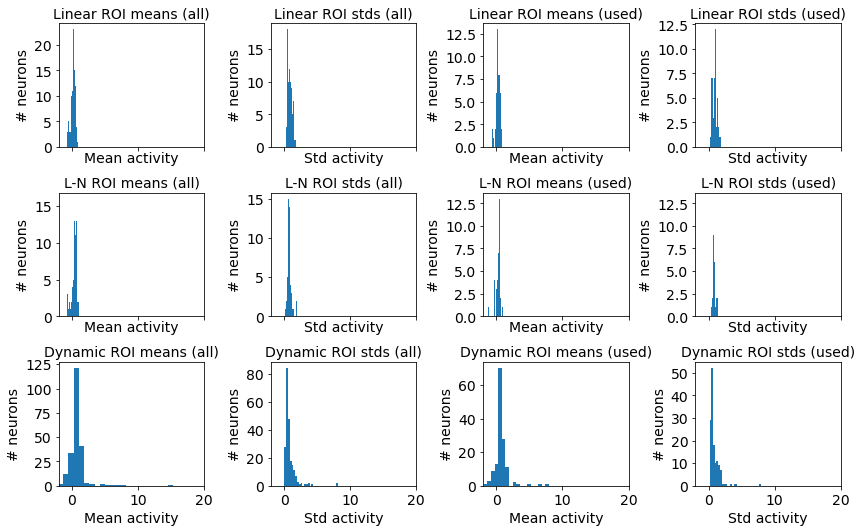

In [7]:
fig, axs = plt.subplots(3, 4, figsize=(12, 7.5), sharex=True, tight_layout=True)
# distribution across neurons of each neurons total mean firing rate across trials
axs[0, 0].hist(wt_tr@mns_lin_all, bins=30)
set_plot(axs[0, 0], x_label='Mean activity', y_label='# neurons', title='Linear ROI means (all)', font_size=14)

axs[0, 1].hist(np.sqrt(wt_tr@vrs_lin_all), bins=30)
set_plot(axs[0, 1], x_label='Std activity', y_label='# neurons', title='Linear ROI stds (all)', font_size=14)

axs[0, 2].hist(wt_tr@mns_lin_used, bins=30)
set_plot(axs[0, 2], x_label='Mean activity', y_label='# neurons', title='Linear ROI means (used)', font_size=14)

axs[0, 3].hist(np.sqrt(wt_tr@vrs_lin_used), bins=30)
set_plot(axs[0, 3], x_label='Std activity', y_label='# neurons', title='Linear ROI stds (used)', font_size=14)

axs[1, 0].hist(wt_tr@mns_ln_all, bins=60)
set_plot(axs[1, 0], x_label='Mean activity', y_label='# neurons', title='LN ROI means (all)', font_size=14)

axs[1, 1].hist(np.sqrt(wt_tr@vrs_ln_all), bins=60)
set_plot(axs[1, 1], x_label='Std activity', y_label='# neurons', title='LN ROI stds (all)', font_size=14)

axs[1, 2].hist(wt_tr@mns_ln_used, bins=60)
set_plot(axs[1, 2], x_label='Mean activity', y_label='# neurons', title='LN ROI means (used)', font_size=14)

axs[1, 3].hist(np.sqrt(wt_tr@vrs_ln_used), bins=60)
set_plot(axs[1, 3], x_label='Std activity', y_label='# neurons', title='LN ROI stds (used)', font_size=14)

axs[2, 0].hist(wt_tr@mns_ma_all, bins=30)
set_plot(axs[2, 0], x_label='Mean activity', y_label='# neurons', title='MA ROI means (all)', font_size=14)

axs[2, 1].hist(np.sqrt(wt_tr@vrs_ma_all), bins=30)
set_plot(axs[2, 1], x_label='Std activity', y_label='# neurons', title='MA ROI stds (all)', font_size=14)

axs[2, 2].hist(wt_tr@mns_ma_used, bins=30)
set_plot(axs[2, 2], x_label='Mean activity', y_label='# neurons', title='MA ROI means (used)', font_size=14)

axs[2, 3].hist(np.sqrt(wt_tr@vrs_ma_used), bins=30)
set_plot(axs[2, 3], x_label='Std activity', y_label='# neurons', title='MA ROI stds (used)', font_size=14)

axs[0, 0].set_xlim(-2, 20)

In [10]:
# complete histograms for example ROIs
IRS_XPL = [20, 50, 80, 100]

# linear
rs_xpl_lin = [[] for ir_xpl in IRS_XPL]
bincs_lin = []
ctss_lin = []

for itr in range(NTR):
    df_tr = np.load(f'{PFX_BAKER_LIN_TR}_{itr}.npy', allow_pickle=True)[0]['df']
    for cir_xpl, ir_xpl in enumerate(IRS_XPL):
        rs_xpl_lin[cir_xpl].extend(np.array(df_tr[f'R_{ir_xpl}']))
        
for ir_xpl, r_xpl in zip(IRS_XPL, rs_xpl_lin):
    cts, bins = np.histogram(r_xpl, bins=50)
    binc = .5*(bins[:-1] + bins[1:])
    bincs_lin.append(binc)
    ctss_lin.append(cts)
    
# LN
rs_xpl_ln = [[] for ir_xpl in IRS_XPL]
bincs_ln = []
ctss_ln = []

for itr in range(NTR):
    df_tr = np.load(f'{PFX_BAKER_LN_TR}_{itr}.npy', allow_pickle=True)[0]['df']
    for cir_xpl, ir_xpl in enumerate(IRS_XPL):
        rs_xpl_ln[cir_xpl].extend(np.array(df_tr[f'R_{ir_xpl}']))
        
for ir_xpl, r_xpl in zip(IRS_XPL, rs_xpl_ln):
    cts, bins = np.histogram(r_xpl, bins=50)
    binc = .5*(bins[:-1] + bins[1:])
    bincs_ln.append(binc)
    ctss_ln.append(cts)

# multiplicative adaptation
rs_xpl_ma = [[] for ir_xpl in IRS_XPL]
bincs_ma = []
ctss_ma = []

for itr in range(NTR):
    df_tr = np.load(f'{PFX_BAKER_MA_TR}_{itr}.npy', allow_pickle=True)[0]['df']
    for cir_xpl, ir_xpl in enumerate(IRS_XPL):
        rs_xpl_ma[cir_xpl].extend(np.array(df_tr[f'R_{ir_xpl}']))
        
for ir_xpl, r_xpl in zip(IRS_XPL, rs_xpl_ma):
    cts, bins = np.histogram(r_xpl, bins=50)
    binc = .5*(bins[:-1] + bins[1:])
    bincs_ma.append(binc)
    ctss_ma.append(cts)

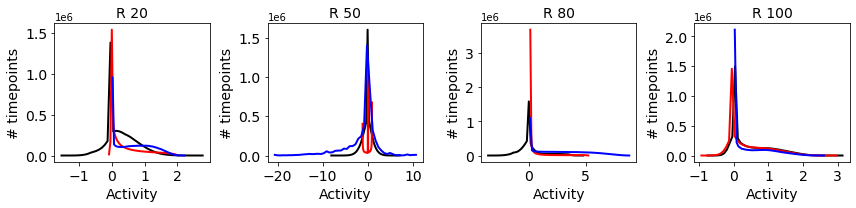

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), tight_layout=True)
for ir_xpl, binc_lin, cts_lin, binc_ln, cts_ln, binc_ma, cts_ma, ax in zip(IRS_XPL, bincs_lin, ctss_lin, bincs_ln, ctss_ln, bincs_ma, ctss_ma, axs):
    ax.plot(binc_lin, cts_lin, c='k', lw=2)
    ax.plot(binc_ln, cts_ln, c='r', lw=2)
    ax.plot(binc_ma, cts_ma, c='b', lw=2)
    ax.set_title(f'R {ir_xpl}')
    
for ax in axs.flatten():
    set_plot(ax, x_label='Activity', y_label='# timepoints', font_size=14)